In [1]:
#import libraries
import pandas as pd
import numpy as np
import requests as rq
import matplotlib.pyplot as plt

###### versions in this project
Pandas Version - '1.4.3'

Seaborn version - '0.11.2'

Numpy Version - '1.21.5'

In [2]:
# read files here
df_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

with open('image-predictions.tsv', mode = 'wb') as file:
    response = rq.get(url)
    file.write(response.content)
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')

3. Use the Tweept library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
#  import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'
# #
# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API

# tweet_ids = df_archive.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Failed")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [5]:
df_twitter = pd.read_json('tweet_json.txt', lines=True)

Drop Columns from each Dataframe

In [6]:
new_df_twitter = df_twitter.drop(columns = ['id_str','contributors', 'coordinates', 'display_text_range', 'entities',
                                            'extended_entities', 'favorited', 'full_text', 'geo', 'in_reply_to_screen_name',
                                            'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_status_id',
                                            'in_reply_to_user_id','in_reply_to_user_id_str','is_quote_status','lang','place','possibly_sensitive',
                         'possibly_sensitive_appealable','quoted_status','quoted_status_id',
                         'quoted_status_id_str','source','user','truncated', 'retweeted', 'retweeted_status'], axis=1)

In [7]:
new_df_twitter.head(2)

,created_at,id,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,8853,39467
1,2017-08-01 00:17:27+00:00,892177421306343426,6514,33819


In [8]:
new_df_archive = df_archive.drop(columns=['in_reply_to_status_id','in_reply_to_user_id','source','text',
                                       'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                       'expanded_urls'], axis=1)

In [9]:
new_df_archive.head(2)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,None,None,None,None


In [10]:
new_df_image = df_image.drop(columns=['jpg_url', 'p1_conf', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1)

In [11]:
new_df_image.head(2)

,tweet_id,img_num,p1,p1_dog
0,666020888022790149,1,Welsh_springer_spaniel,True
1,666029285002620928,1,redbone,True


## Assessing Data

#### Twitter Archive Table

Check for null values in each dataframe

In [12]:
new_df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2354 non-null   datetime64[ns, UTC]
 1   id              2354 non-null   int64              
 2   retweet_count   2354 non-null   int64              
 3   favorite_count  2354 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3)
memory usage: 73.7 KB


In [13]:
new_df_twitter.head(1)

,created_at,id,retweet_count,favorite_count
0,2017-08-01 16:23:56+00:00,892420643555336193,8853,39467


In [14]:
new_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   rating_numerator    2356 non-null   int64 
 3   rating_denominator  2356 non-null   int64 
 4   name                2356 non-null   object
 5   doggo               2356 non-null   object
 6   floofer             2356 non-null   object
 7   pupper              2356 non-null   object
 8   puppo               2356 non-null   object
dtypes: int64(3), object(6)
memory usage: 165.8+ KB


In [15]:
new_df_archive.head(2)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,13,10,Tilly,None,None,None,None


In [16]:
#check for unique values in the rating_numerator column
new_df_archive.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [17]:
#check for unique values in the ratin_denominator column
new_df_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [18]:
#check the value counts of doggo
new_df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [19]:
#check the value counts of floofer
new_df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [20]:
#check the value counts of pupper
new_df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [21]:
#check the value counts of puppo
new_df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [22]:
new_df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   int64 
 1   img_num   2075 non-null   int64 
 2   p1        2075 non-null   object
 3   p1_dog    2075 non-null   bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 50.8+ KB


In [23]:
new_df_image.head(2)

,tweet_id,img_num,p1,p1_dog
0,666020888022790149,1,Welsh_springer_spaniel,True
1,666029285002620928,1,redbone,True


#### Check that there are no tweets created after August 1, 2017

In [24]:
max_created_at = new_df_twitter.created_at
max_created_at.max()

Timestamp('2017-08-01 16:23:56+0000', tz='UTC')

In [25]:
max_timestamp = new_df_archive.timestamp
max_timestamp.max()

'2017-08-01 16:23:56 +0000'

In [26]:
new_df_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [27]:
new_df_twitter.rename(columns={'id':'tweet_id'}, inplace=True)

In [ ]:
copy_df_image.rename(columns={'p1':'dog_breed'}, inplace=True)

### Quality Issues
`new_df_twitter`
- convert created_at column from datetime to date
- tweet_id to object
- favorite_count to int
- retweet_count to int

`new_df_archive`
- convert timestamp column to date
- rating_numerator column has numbers outside the unique rating system
- rating_denominator column has numbers outside the unique rating system
- change rating numerator to int
- tweet_id to object


`new_df_image`
- tweet_id to object
- replace '_' in p1 column with ' '


### Tidiness Issues

`new_df_archive`
- merge doggo, floofer, pupper, puppo to form new columns
- `new_df_twitter`, `new_df_archive` and `new_df_image` tables to master table

## Cleaning Data

### Quality Issues

In [28]:
# create copies of the dataframees
copy_df_twitter = new_df_twitter.copy()
copy_df_archive = new_df_archive.copy()
copy_df_image = new_df_image.copy()

#### Issue 1: Convert created_at column from datetime to date

##### Code

In [29]:
copy_df_twitter['created_at'] = pd.to_datetime(copy_df_twitter['created_at']).dt.date

##### Test

In [30]:
copy_df_twitter.head(2)

,created_at,tweet_id,retweet_count,favorite_count
0,2017-08-01,892420643555336193,8853,39467
1,2017-08-01,892177421306343426,6514,33819


#### Issue 2: Convert timestamp from datetime to date

In [31]:
copy_df_archive['timestamp'] = pd.to_datetime(copy_df_archive['timestamp']).dt.date

In [32]:
copy_df_archive.head(2)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01,13,10,Tilly,None,None,None,None


#### Issue 3: Fix the rating_numerator

##### Code

In [33]:
# write a function to replace extreme values in the rating numerator column
def correct_numerator(x):
    if x == 17:
        return x - 7
    elif x>18 and x<=26:
        return x // 2
    elif x>=27 and x<=100:
        return x // 5
    elif x>=100 and x <= 1776:
        return 10
    else: 
        return x

##### Test

In [100]:
copy_df_archive.rating_numerator = copy_df_archive.rating_numerator.apply(correct_numerator)
copy_df_archive.rating_numerator = copy_df_archive.rating_numerator.astype(int)
copy_df_archive.rating_numerator.unique()

array([13, 12, 14,  5, 10, 11,  6, 15,  0,  7, 16,  9,  8,  1,  3,  4,  2])

#### Issue 4: Fix the rating_denominator

##### Code

In [35]:
def correct_denominator(x):
    if x != 10:
        return 10
    else:
        return x

##### Test

In [36]:
copy_df_archive.rating_denominator = copy_df_archive.rating_denominator.apply(correct_denominator)
copy_df_archive.rating_denominator.unique()

array([10], dtype=int64)

#### Issue 5: Change all tweet_id to object data types

##### Code

In [94]:
copy_df_archive.tweet_id.astype(str);

In [95]:
copy_df_twitter.tweet_id.astype(str);

In [96]:
copy_df_image.tweet_id.astype(str);

#### Test

In [38]:
copy_df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      2354 non-null   object
 1   tweet_id        2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [97]:
copy_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            9424 non-null   int64 
 1   rating_numerator    9424 non-null   int32 
 2   rating_denominator  9424 non-null   int64 
 3   name                9424 non-null   object
 4   timestamp           9424 non-null   object
 5   dog_stage           9424 non-null   object
 6   dog_stages_value    9424 non-null   object
dtypes: int32(1), int64(2), object(4)
memory usage: 478.7+ KB


In [98]:
copy_df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   2075 non-null   int64 
 1   img_num    2075 non-null   int64 
 2   dog_breed  2075 non-null   object
 3   p1_dog     2075 non-null   bool  
dtypes: bool(1), int64(2), object(1)
memory usage: 50.8+ KB


#### Issue 6: Change favorite_count to int

##### Code

In [89]:
copy_df_twitter.favorite_count.astype(int)

0       39467
1       33819
2       25461
3       42908
4       41048
        ...  
2349      111
2350      311
2351      128
2352      132
2353     2535
Name: favorite_count, Length: 2354, dtype: int32

##### Test

In [90]:
copy_df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            9424 non-null   int64 
 1   rating_numerator    9424 non-null   int32 
 2   rating_denominator  9424 non-null   int64 
 3   name                9424 non-null   object
 4   timestamp           9424 non-null   object
 5   dog_stage           9424 non-null   object
 6   dog_stages_value    9424 non-null   object
dtypes: int32(1), int64(2), object(4)
memory usage: 478.7+ KB


#### Issue 7: Changeretweet_count to int

##### Code

In [88]:
copy_df_twitter.retweet_count.astype(int)

0       8853
1       6514
2       4328
3       8964
4       9774
        ... 
2349      41
2350     147
2351      47
2352      48
2353     532
Name: retweet_count, Length: 2354, dtype: int32

##### Test

In [92]:
copy_df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      2354 non-null   object
 1   tweet_id        2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   favorite_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


#### Issue  8: Replace underscores in p1 column with space

##### Code

In [43]:
copy_df_image.dog_breed = copy_df_image.dog_breed.str.replace('_', ' ')

##### Test

In [44]:
copy_df_image.head(2)

,tweet_id,img_num,dog_breed,p1_dog
0,666020888022790149,1,Welsh Springer Spaniel,True
1,666029285002620928,1,Redbone,True


### Tidiness Issues

#### Melt doggo, floofer, pupper, puppo columns to dog_stage value column

##### Code

In [45]:
copy_df_archive = pd.melt(copy_df_archive, 
                          id_vars = ['tweet_id', 'rating_numerator', 'rating_denominator', 'name', 'timestamp'],
                          var_name = 'dog_stage', 
                          value_name = 'dog_stages_value')

##### Test

In [46]:
copy_df_archive.head(2)

,tweet_id,rating_numerator,rating_denominator,name,timestamp,dog_stage,dog_stages_value
0,892420643555336193,13,10,Phineas,2017-08-01,doggo,None
1,892177421306343426,13,10,Tilly,2017-08-01,doggo,None


#### Merge all the dataframes into one master dataframe

##### Code

In [47]:
df_merge = pd.merge(copy_df_archive, copy_df_image, on = ['tweet_id'])

In [48]:
df_merge.head(3)

,tweet_id,rating_numerator,rating_denominator,name,timestamp,dog_stage,dog_stages_value,img_num,dog_breed,p1_dog
0,892420643555336193,13,10,Phineas,2017-08-01,doggo,None,1,Orange,False
1,892420643555336193,13,10,Phineas,2017-08-01,floofer,None,1,Orange,False
2,892420643555336193,13,10,Phineas,2017-08-01,pupper,None,1,Orange,False


In [49]:
df_master = pd.merge(copy_df_twitter, df_merge, on = ['tweet_id'])

##### Test

In [50]:
df_master.head(10)

,created_at,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,name,timestamp,dog_stage,dog_stages_value,img_num,dog_breed,p1_dog
0,2017-08-01,892420643555336193,8853,39467,13,10,Phineas,2017-08-01,doggo,None,1,Orange,False
1,2017-08-01,892420643555336193,8853,39467,13,10,Phineas,2017-08-01,floofer,None,1,Orange,False
2,2017-08-01,892420643555336193,8853,39467,13,10,Phineas,2017-08-01,pupper,None,1,Orange,False
3,2017-08-01,892420643555336193,8853,39467,13,10,Phineas,2017-08-01,puppo,None,1,Orange,False
4,2017-08-01,892177421306343426,6514,33819,13,10,Tilly,2017-08-01,doggo,None,1,Chihuahua,True
5,2017-08-01,892177421306343426,6514,33819,13,10,Tilly,2017-08-01,floofer,None,1,Chihuahua,True
6,2017-08-01,892177421306343426,6514,33819,13,10,Tilly,2017-08-01,pupper,None,1,Chihuahua,True
7,2017-08-01,892177421306343426,6514,33819,13,10,Tilly,2017-08-01,puppo,None,1,Chihuahua,True
8,2017-07-31,891815181378084864,4328,25461,12,10,Archie,2017-07-31,doggo,None,1,Chihuahua,True
9,2017-07-31,891815181378084864,4328,25461,12,10,Archie,2017-07-31,floofer,None,1,Chihuahua,True


In [51]:
df_master.shape

(8292, 13)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
df_master.to_csv(r'C:\Users\USER\Desktop\project 2\twitter_archive_master.csv', index=False)

## Analyzing And Visualizing Data

In [53]:
# Read twitter_archive_master.csv to a dataframe
mastered_df = pd.read_csv('twitter_archive_master.csv')

In [54]:
mastered_df.head(2)

,created_at,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,name,timestamp,dog_stage,dog_stages_value,img_num,dog_breed,p1_dog
0,2017-08-01,892420643555336193,8853,39467,13,10,Phineas,2017-08-01,doggo,None,1,Orange,False
1,2017-08-01,892420643555336193,8853,39467,13,10,Phineas,2017-08-01,floofer,None,1,Orange,False


In [55]:
mastered_df_copy = mastered_df.copy()

In [56]:
# Drop select rows in multiple columns
index_drop = mastered_df_copy[(mastered_df_copy['p1_dog'] == 'False') | (mastered_df_copy['dog_stages_value'] == 'None') | (mastered_df_copy['name'] == 'None')].index
mastered_df_copy.drop(index_drop, inplace=True)
mastered_df_copy.head(10)

,created_at,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,name,timestamp,dog_stage,dog_stages_value,img_num,dog_breed,p1_dog
36,2017-07-26,890240255349198849,7711,32467,14,10,Cassie,2017-07-26,doggo,doggo,1,Pembroke,True
59,2017-07-24,889531135344209921,2321,15359,13,10,Stuart,2017-07-24,puppo,puppo,1,Golden Retriever,True
114,2017-07-15,886366144734445568,3316,21524,12,10,Roscoe,2017-07-15,pupper,pupper,1,French Bulldog,True
152,2017-07-09,884162670584377345,3128,20771,12,10,Yogi,2017-07-09,doggo,doggo,1,German Shepherd,True
165,2017-07-07,883360690899218434,3825,22986,13,10,Grizzwald,2017-07-07,floofer,floofer,1,Chow,True
178,2017-07-06,882762694511734784,5134,28903,12,10,Gus,2017-07-06,pupper,pupper,1,Labrador Retriever,True
202,2017-07-02,881536004380872706,16570,50199,14,10,a,2017-07-02,pupper,pupper,1,Samoyed,True
255,2017-06-25,878776093423087618,4319,19763,13,10,Snoopy,2017-06-25,puppo,puppo,2,Italian Greyhound,True
286,2017-06-19,876838120628539392,3506,21125,12,10,Ginger,2017-06-19,pupper,pupper,1,Bloodhound,True
314,2017-06-12,874296783580663808,4308,26651,13,10,Jed,2017-06-12,pupper,pupper,1,Cocker Spaniel,True


In [57]:
mastered_df_copy.shape

(203, 13)

In [58]:
#drop dog_stages_value column now that we've used it to drop unnecessary columns
mastered_df_copy.drop('dog_stages_value', axis=1, inplace=True)

In [59]:
mastered_df_copy

,created_at,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,name,timestamp,dog_stage,img_num,dog_breed,p1_dog
36,2017-07-26,890240255349198849,7711,32467,14,10,Cassie,2017-07-26,doggo,1,Pembroke,True
59,2017-07-24,889531135344209921,2321,15359,13,10,Stuart,2017-07-24,puppo,1,Golden Retriever,True
114,2017-07-15,886366144734445568,3316,21524,12,10,Roscoe,2017-07-15,pupper,1,French Bulldog,True
152,2017-07-09,884162670584377345,3128,20771,12,10,Yogi,2017-07-09,doggo,1,German Shepherd,True
165,2017-07-07,883360690899218434,3825,22986,13,10,Grizzwald,2017-07-07,floofer,1,Chow,True
...,...,...,...,...,...,...,...,...,...,...,...,...
6870,2015-12-04,672594978741354496,661,1411,9,10,Scott,2015-12-04,pupper,1,Great Pyrenees,True
6898,2015-12-03,672481316919734272,137,757,12,10,Jazz,2015-12-03,pupper,1,Border Collie,True
6926,2015-12-03,672254177670729728,800,1515,11,10,Rolf,2015-12-03,pupper,1,Pug,True
6950,2015-12-03,672205392827572224,1270,2414,9,10,Opal,2015-12-03,pupper,1,Carton,False


In [60]:
#check for unique values in p1_dog column
mastered_df_copy.p1_dog.unique()

array([ True, False])

There are still rows with False in it but then again, I am not a magician :'(

In [61]:
mastered_df_copy.query('p1_dog == True')

,created_at,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,name,timestamp,dog_stage,img_num,dog_breed,p1_dog
36,2017-07-26,890240255349198849,7711,32467,14,10,Cassie,2017-07-26,doggo,1,Pembroke,True
59,2017-07-24,889531135344209921,2321,15359,13,10,Stuart,2017-07-24,puppo,1,Golden Retriever,True
114,2017-07-15,886366144734445568,3316,21524,12,10,Roscoe,2017-07-15,pupper,1,French Bulldog,True
152,2017-07-09,884162670584377345,3128,20771,12,10,Yogi,2017-07-09,doggo,1,German Shepherd,True
165,2017-07-07,883360690899218434,3825,22986,13,10,Grizzwald,2017-07-07,floofer,1,Chow,True
...,...,...,...,...,...,...,...,...,...,...,...,...
6810,2015-12-05,672975131468300288,1015,1813,10,10,Chuckles,2015-12-05,pupper,1,Pug,True
6870,2015-12-04,672594978741354496,661,1411,9,10,Scott,2015-12-04,pupper,1,Great Pyrenees,True
6898,2015-12-03,672481316919734272,137,757,12,10,Jazz,2015-12-03,pupper,1,Border Collie,True
6926,2015-12-03,672254177670729728,800,1515,11,10,Rolf,2015-12-03,pupper,1,Pug,True


In [62]:
#check shape of dataframe
mastered_df_copy.shape

(203, 12)

In [63]:
#reset the index of the dataframe and drop the initial index so it doesn't create a new row
mastered_df_copy.reset_index(drop=True)

,created_at,tweet_id,retweet_count,favorite_count,rating_numerator,rating_denominator,name,timestamp,dog_stage,img_num,dog_breed,p1_dog
0,2017-07-26,890240255349198849,7711,32467,14,10,Cassie,2017-07-26,doggo,1,Pembroke,True
1,2017-07-24,889531135344209921,2321,15359,13,10,Stuart,2017-07-24,puppo,1,Golden Retriever,True
2,2017-07-15,886366144734445568,3316,21524,12,10,Roscoe,2017-07-15,pupper,1,French Bulldog,True
3,2017-07-09,884162670584377345,3128,20771,12,10,Yogi,2017-07-09,doggo,1,German Shepherd,True
4,2017-07-07,883360690899218434,3825,22986,13,10,Grizzwald,2017-07-07,floofer,1,Chow,True
...,...,...,...,...,...,...,...,...,...,...,...,...
198,2015-12-04,672594978741354496,661,1411,9,10,Scott,2015-12-04,pupper,1,Great Pyrenees,True
199,2015-12-03,672481316919734272,137,757,12,10,Jazz,2015-12-03,pupper,1,Border Collie,True
200,2015-12-03,672254177670729728,800,1515,11,10,Rolf,2015-12-03,pupper,1,Pug,True
201,2015-12-03,672205392827572224,1270,2414,9,10,Opal,2015-12-03,pupper,1,Carton,False


In [64]:
mastered_df_copy.p1_dog.value_counts()

True     153
False     50
Name: p1_dog, dtype: int64

In [65]:
mastered_df_copy.img_num.value_counts()

1    167
2     19
3     11
4      6
Name: img_num, dtype: int64

In [66]:
mastered_df_copy.shape

(203, 12)

In [67]:
mastered_df_copy.created_at.dtype

dtype('O')

In [68]:
# change the created_at column to datetime
# mastered_df_copy['created_at'] = pd.to_datetime(mastered_df_copy['created_at'])

In [69]:
mastered_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 36 to 6958
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   created_at          203 non-null    object
 1   tweet_id            203 non-null    int64 
 2   retweet_count       203 non-null    int64 
 3   favorite_count      203 non-null    int64 
 4   rating_numerator    203 non-null    int64 
 5   rating_denominator  203 non-null    int64 
 6   name                203 non-null    object
 7   timestamp           203 non-null    object
 8   dog_stage           203 non-null    object
 9   img_num             203 non-null    int64 
 10  dog_breed           203 non-null    object
 11  p1_dog              203 non-null    bool  
dtypes: bool(1), int64(6), object(5)
memory usage: 19.2+ KB


In [70]:
# mastered_df_copy['created_at'] = mastered_df_copy['created_at'].dt.weekday

In [71]:
mastered_df_copy.dog_breed.value_counts()

Golden Retriever      20
Pug                    7
Labrador Retriever     6
Pomeranian             6
Pembroke               6
                      ..
Lhasa                  1
Tennis Ball            1
Handkerchief           1
Alp                    1
Carton                 1
Name: dog_breed, Length: 104, dtype: int64

In [72]:
#check the count of dog_stage column
mastered_df_copy.dog_stage.value_counts()

pupper     134
doggo       48
puppo       16
floofer      5
Name: dog_stage, dtype: int64

#### Insights
1. Most dog rating tweets on the @WeRateDogs page contained only one image
2. Pupper is the most popular "dog stage" with floofer being the least popular.
3. Most dog ratings fell between 10 and 12 with ratings between 3 and 6 being the least.

## Visualization

In [73]:
#import seaborn
import seaborn as sns

In [74]:
# use only one color for all visualizations
base_color = sns.color_palette()[0]
base_color

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

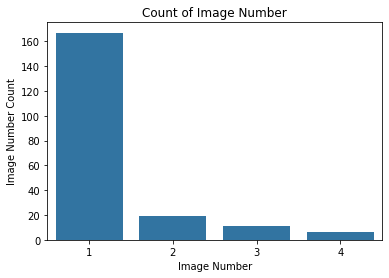

In [81]:
# creates a chart for the 1st insight
sns.countplot(data=mastered_df_copy, x='img_num', color=base_color).set(title='Count of Image Number');
plt.xlabel('Image Number');
plt.ylabel('Image Number Count');

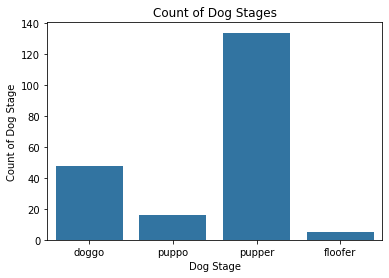

In [85]:
# creates a chart for the 2nd insight
sns.countplot(data=mastered_df_copy, x='dog_stage', color=base_color).set(title='Count of Dog Stages');
plt.xlabel('Dog Stage');
plt.ylabel('Count of Dog Stage');

In [77]:
#check the counts of the rating numerator.
mastered_df_copy.rating_numerator.value_counts()

12    49
11    45
10    41
13    21
9     14
14    13
8     11
7      6
5      1
3      1
6      1
Name: rating_numerator, dtype: int64

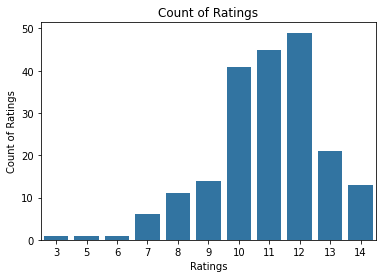

In [86]:
# creates a chart for the 3rd insight
sns.countplot(data=mastered_df_copy, x='rating_numerator', color=base_color).set(title='Count of Ratings');
plt.xlabel('Ratings');
plt.ylabel('Count of Ratings');

In [79]:
mastered_df_copy.to_csv(r'C:\Users\USER\Desktop\project 2\twitter_archive_master_clean.csv', index=False)